In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
data = pd.read_csv('Fin_Uci_thyroid1.csv')
feat = data.iloc[:,0:-1]
tar = data.iloc[:,-1]

In [3]:
oversample = SMOTE()
feat, tar = oversample.fit_resample(feat, tar)

In [4]:
feat.shape

(19743, 31)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(feat)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
from knn import knn_
knn_(principalDf,tar,0.33)

2
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2163
           1       0.98      0.97      0.98      2185
           2       0.98      0.97      0.98      2168

    accuracy                           0.97      6516
   macro avg       0.97      0.97      0.97      6516
weighted avg       0.97      0.97      0.97      6516

3
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2163
           1       0.96      0.98      0.97      2185
           2       0.97      0.99      0.98      2168

    accuracy                           0.97      6516
   macro avg       0.97      0.97      0.97      6516
weighted avg       0.97      0.97      0.97      6516

4
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2163
           1       0.96      0.97      0.96      2185
           2       0.97      0.99      0.98      2168

    accuracy  

In [9]:
from nn import nn
history=nn(feat,tar,0.2)

Epoch 1/50
316/316 [==============================] - 1s 2ms/step - loss: 0.8780 - accuracy: 0.5906 - val_loss: 0.4250 - val_accuracy: 0.8629
Epoch 2/50
316/316 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7999 - val_loss: 0.2616 - val_accuracy: 0.9091
Epoch 3/50
316/316 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8475 - val_loss: 0.2135 - val_accuracy: 0.9272
Epoch 4/50
316/316 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8670 - val_loss: 0.1898 - val_accuracy: 0.9364
Epoch 5/50
316/316 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8947 - val_loss: 0.1591 - val_accuracy: 0.9525
Epoch 6/50
316/316 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.9114 - val_loss: 0.1364 - val_accuracy: 0.9645
Epoch 7/50
316/316 [==============================] - 1s 2ms/step - loss: 0.2385 - accuracy: 0.9254 - val_loss: 0.1140 - val_accuracy: 0.9709
Epoch 

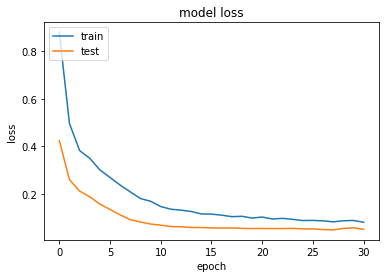

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
from naivebayes import naive_bayes
naive_bayes(feat,tar,0.2)

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      1344
           1       0.68      0.86      0.76      1298
           2       0.76      0.78      0.77      1307

    accuracy                           0.73      3949
   macro avg       0.74      0.73      0.73      3949
weighted avg       0.74      0.73      0.73      3949



In [12]:
from xgboost_ import xgboost_
xgboost_(feat,tar,0.2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1344
           1       1.00      1.00      1.00      1298
           2       0.98      0.99      0.99      1307

    accuracy                           0.99      3949
   macro avg       0.99      0.99      0.99      3949
weighted avg       0.99      0.99      0.99      3949



In [13]:
from ensemble_ import ensemble_
ensemble_(feat,tar,0.2)

{'n_neighbors': 1}
{'n_estimators': 50}
knn: 0.9835401367434794
rf: 0.9934160546973917
log_reg: 0.9139022537351228
ensemble voting score:  0.9906305393770575
ensemble bagging score:  0.9944289693593314
ensemble stacking score:  0.9936692833628766
